In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, ConfusionMatrixDisplay

In [2]:
odi = pd.read_csv("virat_kohli_odi_innings_data.csv")
t20 = pd.read_csv("virat_kohli_t20i_innings_data.csv")
test = pd.read_csv("virat_kohli_test_innings_data.csv")

In [3]:
Runs = pd.concat([odi['Runs'], t20['Runs'], test['Runs']])
SR = pd.concat([odi['SR'], t20['SR'], test['SR']])
ground = pd.concat([odi['Ground'], t20['Ground'], test['Ground']])
match_type = np.concatenate((np.repeat("ODI", len(odi['Runs'])), np.repeat("T20", len(t20['Runs'])), np.repeat("TEST", len(test['Runs']))))


In [4]:
data_cricketer = {
    'Runs': Runs,
    'SR': SR,
    'match_type': match_type,
    'Ground': ground
}

data_cricketer = pd.DataFrame(data_cricketer)

In [5]:
data_cricketer['Runs'] = pd.to_numeric(data_cricketer['Runs'], errors='coerce')
data_cricketer['SR'] = pd.to_numeric(data_cricketer['SR'], errors='coerce')
data_cricketer = data_cricketer.dropna(subset=['Runs', 'SR'])
data_cricketer['Runs'] = data_cricketer['Runs'].astype(int)
data_cricketer['SR'] = data_cricketer['SR'].astype(float)

In [6]:
x = data_cricketer[['Runs', 'SR']]
y = data_cricketer['match_type']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
svc = SVC(kernel='poly', degree=3)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

              precision    recall  f1-score   support

         ODI       0.75      0.79      0.77        73
         T20       0.92      0.67      0.77        33
        TEST       0.76      0.83      0.80        54

    accuracy                           0.78       160
   macro avg       0.81      0.76      0.78       160
weighted avg       0.79      0.78      0.78       160

Accuracy: 0.78125
Balanced Accuracy: 0.7648401826484018


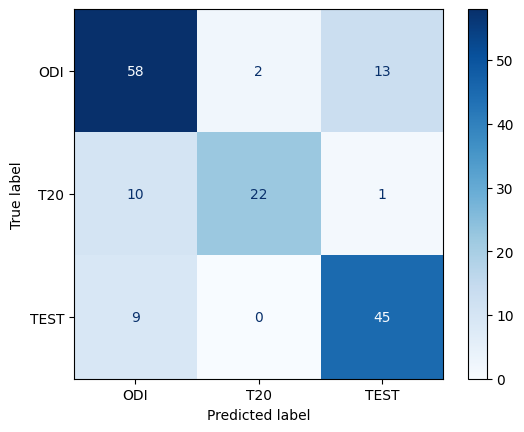

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(conf_matrix, display_labels=svc.classes_).plot(cmap='Blues')
print("Accuracy:", acc)
print("Balanced Accuracy:", bal_acc)

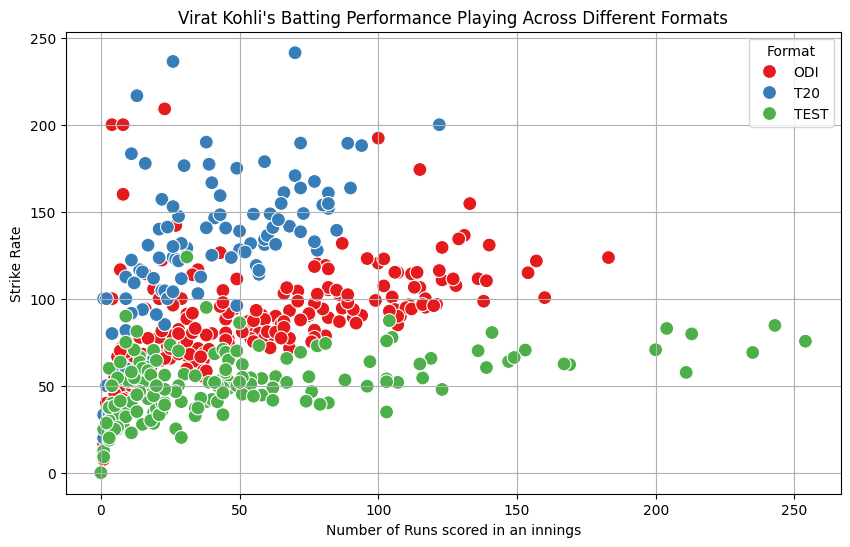

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cricketer, x='Runs', y='SR', hue='match_type', palette='Set1', s=100)
plt.title("Virat Kohli's Batting Performance Playing Across Different Formats")
plt.xlabel('Number of Runs scored in an innings')
plt.ylabel('Strike Rate')
plt.grid(True)
plt.legend(title='Format')
plt.show()

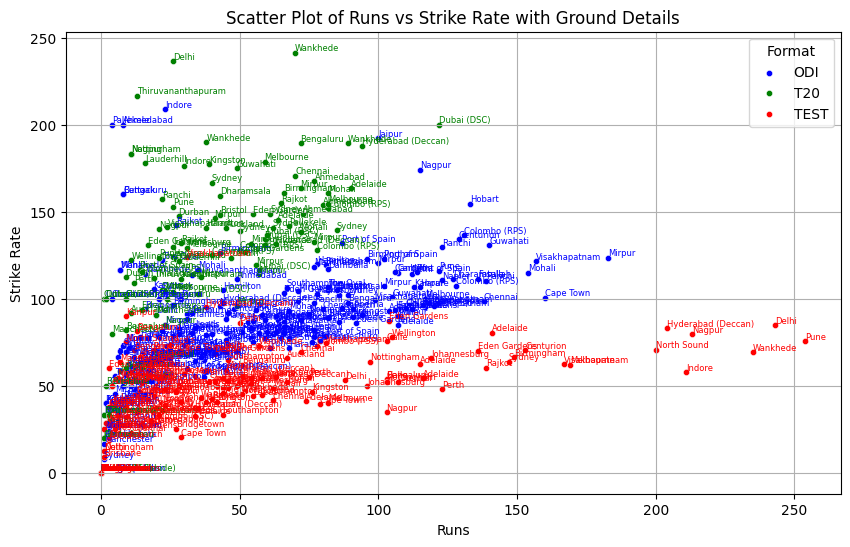

In [12]:
plt.figure(figsize=(10, 6))
for match_type, color in zip(['ODI', 'T20', 'TEST'], ['blue', 'green', 'red']):
    sns.scatterplot(data=data_cricketer[data_cricketer['match_type'] == match_type], x='Runs', y='SR', color=color, s=20, label=match_type)
    for i, (runs, sr, ground, mt) in enumerate(zip(data_cricketer['Runs'], data_cricketer['SR'], data_cricketer['Ground'], data_cricketer['match_type'])):
        if mt == match_type:
            plt.text(runs, sr, ground, fontsize=6, ha='left', va='bottom', color=color)
plt.title('Scatter Plot of Runs vs Strike Rate with Ground Details')
plt.xlabel('Runs')
plt.ylabel('Strike Rate')
plt.grid(True)
plt.legend(title='Format')
plt.show()

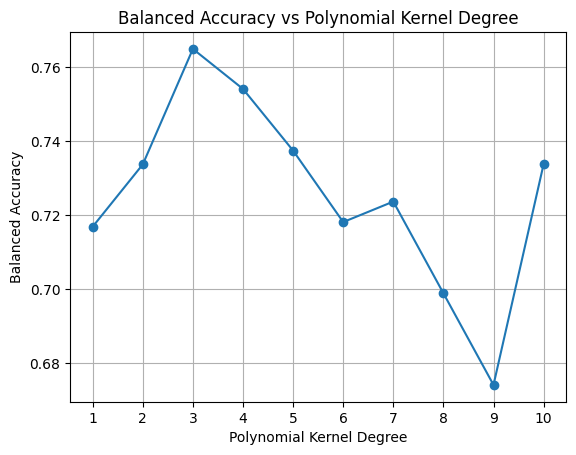

In [13]:
degrees = range(1, 11)
bal_acc_scores = []

for degree in degrees:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    svc = SVC(kernel='poly', degree=degree)
    svc.fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    bal_acc_scores.append(bal_acc)

plt.plot(degrees, bal_acc_scores, marker='o')
plt.title('Balanced Accuracy vs Polynomial Kernel Degree')
plt.xlabel('Polynomial Kernel Degree')
plt.ylabel('Balanced Accuracy')
plt.xticks(degrees)
plt.grid(True)
plt.show()